# https://nlp100.github.io/ja/ch04.html

## 前準備

In [1]:
!pip install mecab-python3
!pip install pandas
!pip install unidic
!python -m unidic download
!pip install japanize-matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 591.2/591.2 kB 3.3 MB/s eta 0:00:00
  Using cached pandas-2.2.3-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (89 kB)
  Using cached pytz-2024.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2024.2-py2.py3-none-any.whl.metadata (1.4 kB)
Using cached pandas-2.2.3-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (12.7 MB)
Using cached pytz-2024.2-py2.py3-none-any.whl (508 kB)
Using cached tzdata-2024.2-py2.py3-none-any.whl (346 kB)
  Installing build dependencies ... one
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for unidic: filename=unidic-1.1.0-py3-none-any.whl size=7441 sha256=42675d5f715cd3d29be358441c4913a3d3c47c641027b99e6488a6039b4407ab
  Stored in directory: /home/ryu/.cache/pip/wheels/cb/04/a2/659428f84ed1fa7257f8efb544b36043dd37a7c419e8ca711a
Successfully built unidic
download url: https://cotonoha-dic.s3-ap-northeast-1.ama

In [2]:
import MeCab
mecab = MeCab.Tagger()
with open('./datafiles/neko.txt', 'r', encoding="utf-8") as f1, open('./datafiles/neko.txt.mecab', 'w', encoding="utf-8") as f2:
    lines = f1.readlines()
    for line in lines:
        parsed_text = mecab.parse(line)
        f2.write(parsed_text)

## 30. 形態素解析結果の読み込み
- 形態素解析結果（neko.txt.mecab）を読み込むプログラムを実装せよ．ただし，各形態素は表層形（surface），基本形（base），品詞（pos），品詞細分類1（pos1）をキーとするマッピング型に格納し，1文を形態素（マッピング型）のリストとして表現せよ．第4章の残りの問題では，ここで作ったプログラムを活用せよ．

In [3]:
# 格納された形態素解析ファイルの構造を確認　→　見出し語と形態素解析の結果はtabで区切られている
line_20_output = !sed -n '20p' ./datafiles/neko.txt.mecab
print(line_20_output)

['どこ\t代名詞,,,,,,ドコ,何処,どこ,ドコ,どこ,ドコ,和,"","","","","","",体,ドコ,ドコ,ドコ,ドコ,"1","","",7490706465759744,27251']


In [4]:
# tabで区切られたテキストを分割の処理方法　→　splitを使用
splitted_text = line_20_output[0].split('\t')
print(splitted_text)

['どこ', '代名詞,,,,,,ドコ,何処,どこ,ドコ,どこ,ドコ,和,"","","","","","",体,ドコ,ドコ,ドコ,ドコ,"1","","",7490706465759744,27251']


In [5]:
# 同様にカンマ区切りでも区切ることが可能
splitted_text[1].split(',')

['代名詞',
 '',
 '',
 '',
 '',
 '',
 'ドコ',
 '何処',
 'どこ',
 'ドコ',
 'どこ',
 'ドコ',
 '和',
 '""',
 '""',
 '""',
 '""',
 '""',
 '""',
 '体',
 'ドコ',
 'ドコ',
 'ドコ',
 'ドコ',
 '"1"',
 '""',
 '""',
 '7490706465759744',
 '27251']

read(): Reads the entire file at once into a single string, unless a size limit is set.  
readlines(): Reads the entire file into a list of strings, with each string representing a line from the file.

In [6]:
neko_dict = {}
neko_list = []
neko_general_list = []

with open('./datafiles/neko.txt.mecab', 'r', encoding='utf-8') as f:
    lines = f.readlines()
    for line in lines[0:]:
        if line == 'EOS\n':
            pass
        else:
            tab_splitted_line = line.split('\t') # 見出し語と解析結果を分割
            comma_splitted_line = tab_splitted_line[1].split(',') # 解析結果を分割
            neko_dict['surface'] = tab_splitted_line[0] # 表示されている文字列(表層形: surface) 
            if len(comma_splitted_line) <= 7:
                neko_dict["base"] = comma_splitted_line[0] # 基本形(基本形: base) 
            else:
                neko_dict["base"] = comma_splitted_line[7]
            neko_dict["pos"] = comma_splitted_line[0] # 品詞（pos）
            neko_dict["pos1"] = comma_splitted_line[1] # 品詞細分類1（pos1）
            neko_list.append(neko_dict.copy())

            if tab_splitted_line[0] == '。':
                neko_general_list.append(neko_list.copy())
                neko_list = []

In [7]:
neko_general_list[0:3]

[[{'surface': '一', 'base': '一', 'pos': '名詞', 'pos1': '数詞'},
  {'surface': '\u3000', 'base': '\u3000', 'pos': '空白', 'pos1': ''},
  {'surface': '吾輩', 'base': '我が輩', 'pos': '代名詞', 'pos1': ''},
  {'surface': 'は', 'base': 'は', 'pos': '助詞', 'pos1': '係助詞'},
  {'surface': '猫', 'base': '猫', 'pos': '名詞', 'pos1': '普通名詞'},
  {'surface': 'で', 'base': 'だ', 'pos': '助動詞', 'pos1': ''},
  {'surface': 'ある', 'base': '有る', 'pos': '動詞', 'pos1': '非自立可能'},
  {'surface': '。', 'base': '。', 'pos': '補助記号', 'pos1': '句点'}],
 [{'surface': '名前', 'base': '名前', 'pos': '名詞', 'pos1': '普通名詞'},
  {'surface': 'は', 'base': 'は', 'pos': '助詞', 'pos1': '係助詞'},
  {'surface': 'まだ', 'base': '未だ', 'pos': '副詞', 'pos1': ''},
  {'surface': '無い', 'base': '無い', 'pos': '形容詞', 'pos1': '非自立可能'},
  {'surface': '。', 'base': '。', 'pos': '補助記号', 'pos1': '句点'}],
 [{'surface': '\u3000', 'base': '\u3000', 'pos': '空白', 'pos1': ''},
  {'surface': 'どこ', 'base': '何処', 'pos': '代名詞', 'pos1': ''},
  {'surface': 'で', 'base': 'で', 'pos': '助詞', 'pos1': '格助詞

## 31. 動詞
- 動詞の表層形をすべて抽出せよ．

In [8]:
verb_dict = {}
for neko_list in neko_general_list:
    for neko_dict in neko_list:
        if neko_dict['pos'] == '動詞':
            # 辞書からキーで値を取得し、キーが存在しない場合は None を返す
            verb_value = verb_dict.get(neko_dict['surface'])
            if verb_value == None:
                # 始めて追加する場合にはカウントを1
                verb_dict[neko_dict['surface']] = 1
            else:
                # 二回目以降に登場する場合にはカウントアップ
                verb_dict[neko_dict['surface']] = verb_dict[neko_dict['surface']] + 1

In [9]:
import pandas as pd
df = pd.DataFrame.from_dict(verb_dict, orient='index', columns=['Count'])

In [10]:
# 登場回数の多い動詞の表層形をランキング
df.sort_values(by=['Count'], ascending=[False]).head(10)

,Count
し,2471
ある,1689
いる,1255
する,1055
云う,937
なっ,408
なる,395
来,379
い,372
見,364


In [11]:
# 表層形の数
len(df)

4086

## 32. 動詞の基本形
- 動詞の基本形をすべて抽出せよ．

In [12]:
verb_dict = {}
for neko_list in neko_general_list:
    for neko_dict in neko_list:
        if neko_dict['pos'] == '動詞':
            # 辞書からキーで値を取得し、キーが存在しない場合は None を返す
            verb_value = verb_dict.get(neko_dict['base'])
            if verb_value == None:
                # 始めて追加する場合にはカウントを1
                verb_dict[neko_dict['base']] = 1
            else:
                # 二回目以降に登場する場合にはカウントアップ
                verb_dict[neko_dict['base']] = verb_dict[neko_dict['base']] + 1

In [13]:
import pandas as pd
df = pd.DataFrame.from_dict(verb_dict, orient='index', columns=['Count'])

In [14]:
# 登場回数の多い動詞の表層形をランキング
df.sort_values(by=['Count'], ascending=[False]).head(10)

,Count
為る,3925
有る,2313
居る,1780
言う,1692
成る,1093
見る,697
来る,629
思う,515
行く,444
聞く,383


## 33. 「AのB」
- 2つの名詞が「の」で連結されている名詞句を抽出せよ．

In [15]:
a_no_b_list = []
for neko_list in neko_general_list:
    neko_list_len = len(neko_list)
    for counter in range(1, neko_list_len):
        if ((neko_list[counter]['pos'] == '助詞') \
            and (neko_list[counter]['surface'] == 'の')
            and (neko_list[counter-1]['pos'] == '名詞')
            and (neko_list[counter+1]['pos'] == '名詞')
           ):
            a_no_b_list.append((neko_list[counter-1]['surface'],neko_list[counter]['surface'],neko_list[counter+1]['surface']))

In [16]:
a_no_b_list[0:20]

[('掌', 'の', '上'),
 ('書生', 'の', '顔'),
 ('はず', 'の', '顔'),
 ('顔', 'の', '真中'),
 ('穴', 'の', '中'),
 ('書生', 'の', '掌'),
 ('掌', 'の', '裏'),
 ('藁', 'の', '上'),
 ('笹原', 'の', '中'),
 ('池', 'の', '前'),
 ('一樹', 'の', '蔭'),
 ('垣根', 'の', '穴'),
 ('隣家', 'の', '三毛'),
 ('時', 'の', '通路'),
 ('一刻', 'の', '猶予'),
 ('家', 'の', '内'),
 ('以外', 'の', '人間'),
 ('前', 'の', '書生'),
 ('胸', 'の', '痞'),
 ('家', 'の', '主人')]

## 34. 名詞の連接
- 名詞の連接（連続して出現する名詞）を最長一致で抽出せよ．

In [17]:
noun_noun_list = []
for neko_list in neko_general_list:
    neko_list_len = len(neko_list)
    for counter in range(1, neko_list_len):
        if ((neko_list[counter]['pos'] == '名詞') \
            and (neko_list[counter-1]['pos'] == '名詞')
           ):
            noun_noun_list.append((neko_list[counter-1]['surface'],neko_list[counter]['surface']))

In [18]:
noun_noun_list[0:20]

[('時', '妙'),
 ('一', '毛'),
 ('後', '猫'),
 ('一', '度'),
 ('上', '今'),
 ('うち', '池の上'),
 ('左', 'り'),
 ('書生', '以外'),
 ('宿', 'なし'),
 ('まま', '奥'),
 ('終日', '書斎'),
 ('時々', '忍び足'),
 ('淡黄', '色'),
 ('二三', 'ページ'),
 ('主人', '以外'),
 ('朝', '主人'),
 ('椽', '側'),
 ('一', '間'),
 ('神経', '胃弱'),
 ('時々', '同衾')]

## 35. 単語の出現頻度
- 文章中に出現する単語とその出現頻度を求め，出現頻度の高い順に並べよ．

In [19]:
surface_dict = {}
for neko_list in neko_general_list:
    for neko_dict in neko_list:
        if neko_dict['pos'] in ['名詞', '動詞']: # 限定しなくてもいいが、とりあえず、名詞と動詞でカウント
            surface_value = surface_dict.get(neko_dict['surface'])
            if surface_value == None:
                # 始めて追加する場合にはカウントを1
                surface_dict[neko_dict['surface']] = 1
            else:
                # 二回目以降に登場する場合にはカウントアップ
                surface_dict[neko_dict['surface']] = surface_dict[neko_dict['surface']] + 1

In [20]:
import pandas as pd
df = pd.DataFrame.from_dict(surface_dict, orient='index', columns=['Count'])

In [21]:
# 登場回数の多い動詞の表層形をランキング
df = df.sort_values(by=['Count'], ascending=[False]).head(10)

In [22]:
list(df.index)

['し', 'ある', 'いる', '事', 'する', 'もの', '云う', '主人', '一', 'なっ']

In [23]:
list(df['Count'])

[2471, 1689, 1255, 1210, 1055, 973, 937, 934, 490, 408]

## 36. 頻度上位10語
- 出現頻度が高い10語とその出現頻度をグラフ（例えば棒グラフなど）で表示せよ．

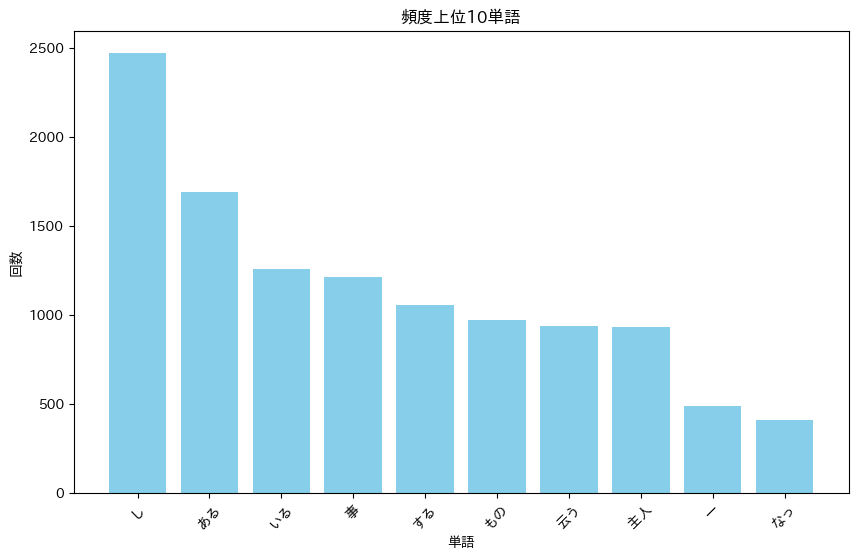

In [24]:
import matplotlib.pyplot as plt
import japanize_matplotlib  # 日本語表示のためにインポート

# ヒストグラムを表示
plt.figure(figsize=(10, 6))  # グラフのサイズを設定
plt.bar(list(df.index), list(df['Count']), color='skyblue')  # 棒グラフの作成
plt.xlabel('単語')  # x軸のラベル
plt.ylabel('回数')  # y軸のラベル
plt.title('頻度上位10単語')  # グラフのタイトル
plt.xticks(rotation=45)  # x軸のラベルを45度回転して表示
plt.show()

## 37. 「猫」と共起頻度の高い上位10語
- 「猫」とよく共起する（共起頻度が高い）10語とその出現頻度をグラフ（例えば棒グラフなど）で表示せよ．

In [57]:
window_size = 2 # Windows Sizeを指定
surface_dict = {}

for neko_list in neko_general_list:
    for i, token in enumerate(neko_list):
        # '猫' を見つけたら前後の単語を調べる
        if token['surface'] == '猫':
            for offset in range(1, window_size + 1):
                # 前の単語をチェック
                left_idx = i - offset
                if left_idx >= 0:
                    left_token = neko_list[left_idx]
                    if left_token['pos'] in ['動詞']:
                        surface_value = left_token['surface']
                        if surface_value:
                            surface_dict[surface_value] = surface_dict.get(surface_value, 0) + 1

                # 後ろの単語をチェック
                right_idx = i + offset
                if right_idx < len(neko_list):
                    right_token = neko_list[right_idx]
                    if right_token['pos'] in ['動詞']:
                        surface_value = right_token['surface']
                        if surface_value:
                            surface_dict[surface_value] = surface_dict.get(surface_value, 0) + 1

In [61]:
import pandas as pd
df = pd.DataFrame.from_dict(surface_dict, orient='index', columns=['Count'])

In [62]:
# 登場回数の多い動詞の表層形をランキング
df = df.sort_values(by=['Count'], ascending=[False]).head(10)

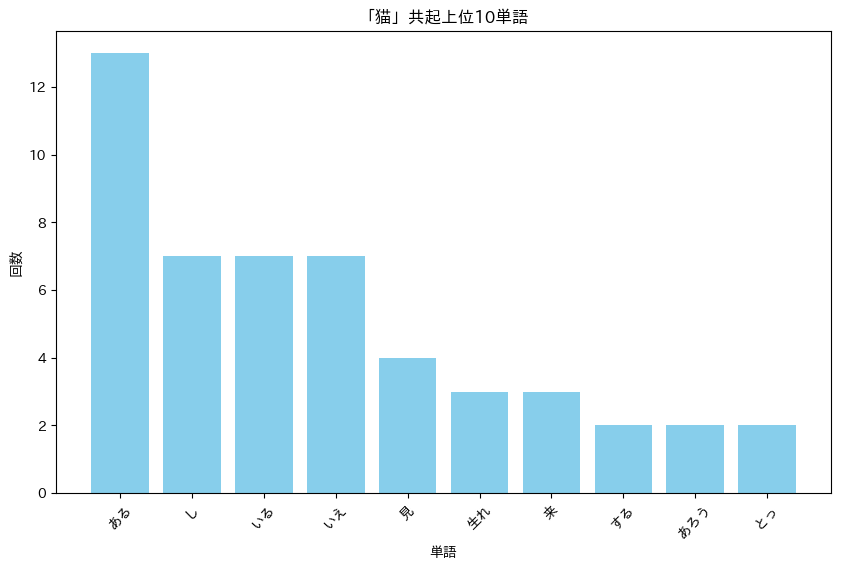

In [63]:
import matplotlib.pyplot as plt
import japanize_matplotlib  # 日本語表示のためにインポート

# ヒストグラムを表示
plt.figure(figsize=(10, 6))  # グラフのサイズを設定
plt.bar(list(df.index), list(df['Count']), color='skyblue')  # 棒グラフの作成
plt.xlabel('単語')  # x軸のラベル
plt.ylabel('回数')  # y軸のラベル
plt.title('「猫」共起上位10単語')  # グラフのタイトル
plt.xticks(rotation=45)  # x軸のラベルを45度回転して表示
plt.show()

## 38. ヒストグラム  
単語の出現頻度のヒストグラムを描け．ただし，横軸は出現頻度を表し，1から単語の出現頻度の最大値までの線形目盛とする．縦軸はx軸で示される出現頻度となった単語の異なり数（種類数）である．

In [127]:
surface_dict = {}
for neko_list in neko_general_list:
    for neko_dict in neko_list:
        if neko_dict['pos'] in ['名詞', '動詞']: # 限定しなくてもいいが、とりあえず、名詞と動詞でカウント
            surface_value = surface_dict.get(neko_dict['base'])
            if surface_value == None:
                # 始めて追加する場合にはカウントを1
                surface_dict[neko_dict['base']] = 1
            else:
                # 二回目以降に登場する場合にはカウントアップ
                surface_dict[neko_dict['base']] = surface_dict[neko_dict['base']] + 1

In [128]:
df = pd.DataFrame(list(surface_dict.items()), columns=['word', 'count'])

In [134]:
# 出現回数ごとの単語の種類数を集計
frequency = df['count'].value_counts().sort_index()

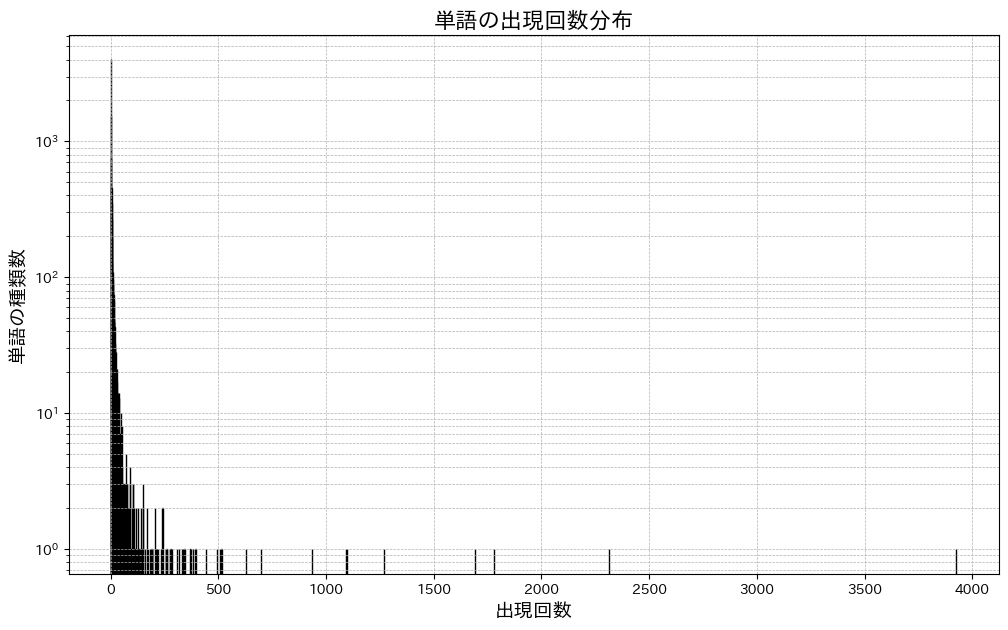

In [135]:
# ヒストグラムの作成
plt.figure(figsize=(12, 7))
plt.bar(frequency.index, frequency.values, width=0.8, color='skyblue', edgecolor='black')
plt.xlabel('出現回数', fontsize=14)
plt.ylabel('単語の種類数', fontsize=14)
plt.title('単語の出現回数分布', fontsize=16)

# y軸を対数スケールに設定
plt.yscale('log')

# グリッドを追加すると見やすくなる場合があります
plt.grid(True, which="both", ls="--", linewidth=0.5)

plt.show()

## 39. Zipfの法則
単語の出現頻度順位を横軸，その出現頻度を縦軸として，両対数グラフをプロットせよ．

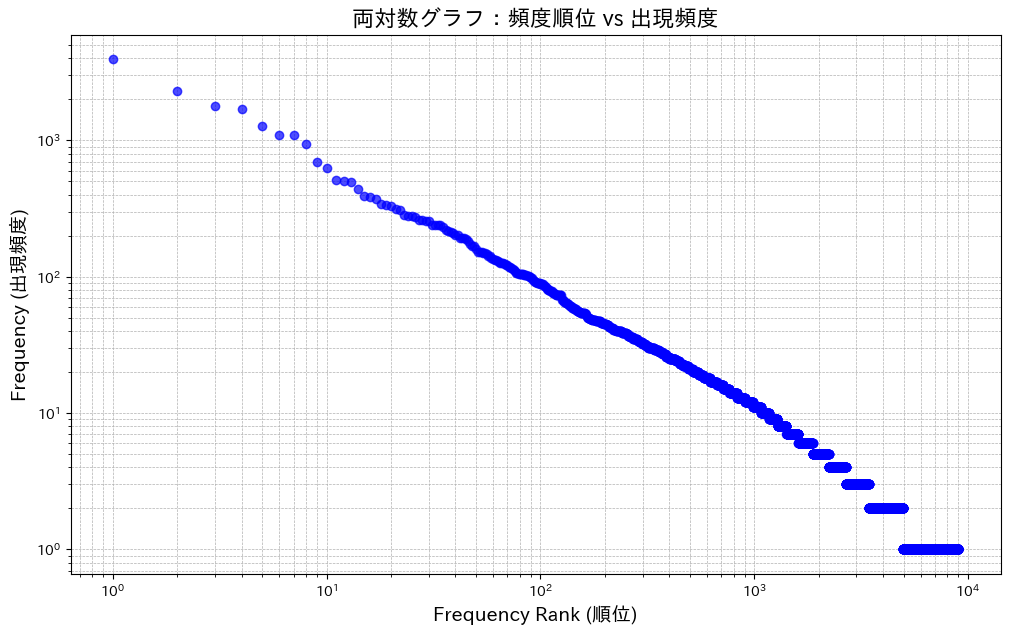

In [136]:
import matplotlib.pyplot as plt
import numpy as np

# 出現頻度をソートしてリストに変換
sorted_surface = sorted(surface_dict.items(), key=lambda x: x[1], reverse=True)

# 順位（1, 2, 3, ...）と頻度のリストを作成
ranks = np.arange(1, len(sorted_surface) + 1)
frequencies = np.array([freq for _, freq in sorted_surface])

# 両対数グラフのプロット
plt.figure(figsize=(12, 7))
plt.loglog(ranks, frequencies, marker="o", linestyle="none", color="blue", alpha=0.7)

# ラベルとタイトルの設定
plt.xlabel('Frequency Rank (順位)', fontsize=14)
plt.ylabel('Frequency (出現頻度)', fontsize=14)
plt.title('両対数グラフ：頻度順位 vs 出現頻度', fontsize=16)

# グリッドを追加
plt.grid(True, which="both", linestyle="--", linewidth=0.5)

# グラフを表示
plt.show()